<font size="7">**Esmeralda output review**</font>

<font size="4">This notebook serves as documentation for esmeralda output
1. Summary/Events is per event summary
2. Tracking/Tracks contains per track variables relevant for blob analysis
3. CHITS/highTh inclusive list of hits with corrected energy (not callibrated!)


In [1]:
import numpy              as np
import pandas             as pd
import matplotlib         as mpl
import matplotlib.pyplot  as plt
from mpl_toolkits.mplot3d import Axes3D

from invisible_cities.io.dst_io import load_dst

In [34]:
%%capture
! wget https://www.dropbox.com/s/7zc9virueaqpr6o/cdst_6485_trigger2_8.h5

In [36]:
#load tables into dataframes
hits    = load_dst('cdst_6485_trigger2_8.h5', 'CHITS'   , 'highTh')
tracks  = load_dst('cdst_6485_trigger2_8.h5', 'Tracking', 'Tracks')
summary = load_dst('cdst_6485_trigger2_8.h5', 'Summary' , 'Events')
kdst    = load_dst('cdst_6485_trigger2_8.h5', 'DST'     , 'Events')

# Summary/Events : all variables related to inclusive list of hits per event

In [37]:
summary.head().T

,0,1,2,3,4
event,2822658,2819933,2819939,2822674,2819947
evt_energy,NaN,0.212848,0.24379,0.187325,0.239912
evt_charge,-1,-1,-1,-1,-1
evt_ntrks,2,1,1,1,2
evt_nhits,52,25,29,23,29
evt_x_avg,NaN,-25.4122,1.52922,113.597,-6.16872
evt_y_avg,NaN,-173.17,103.646,63.7608,18.3557
evt_z_avg,NaN,54.6182,275.138,235.593,236.081
evt_r_avg,NaN,175.163,103.903,130.429,61.0139
evt_x_min,-205,-35,-15,105,-45


### evt_out_of_map is True if there was a hit outside the active volume of the detector. In that case the corrected energy is np.nan since we don't know how to correct it.

In [38]:
np.testing.assert_array_equal(summary.evt_out_of_map, np.isnan(summary.evt_energy))

Text(0, 0.5, 'Counts')

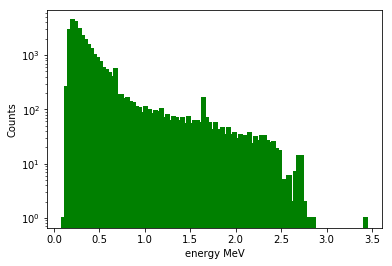

In [39]:
plt.hist(summary.evt_energy[~summary.evt_out_of_map], label='no cut',  color='green',
         bins=100, histtype='step', stacked=True, fill=True, linewidth=2.0);
plt.yscale('log')
plt.xlabel('energy MeV')
plt.ylabel('Counts')

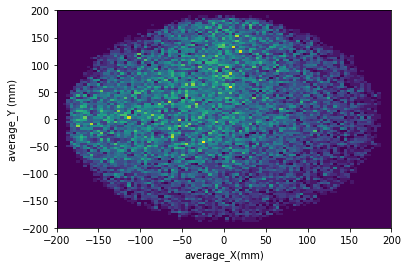

In [40]:
plt.hist2d(summary[~summary.evt_out_of_map].evt_x_avg, summary[~summary.evt_out_of_map].evt_y_avg, bins = np.linspace(-200, 200, 100));
plt.xlabel('average_X(mm)')
plt.ylabel('average_Y (mm)')
plt.hist2d(summary[~summary.evt_out_of_map].evt_x_avg, summary[~summary.evt_out_of_map].evt_y_avg, bins = np.linspace(-200, 200, 100));


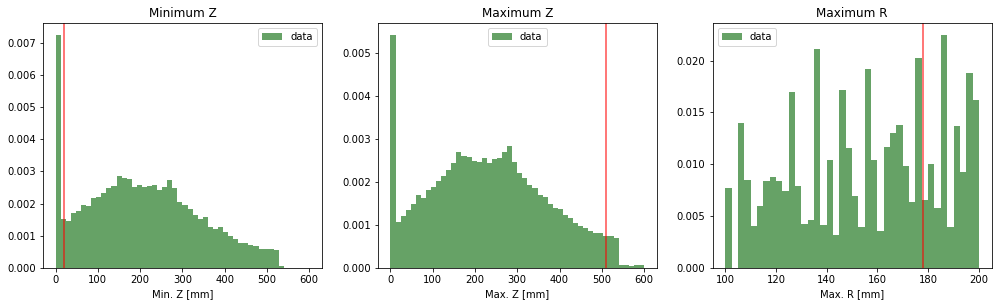

In [41]:
plt.figure(figsize=(17, 4.5));
plt.subplot(1,3,1);
plt.hist(summary[~summary.evt_out_of_map].evt_z_min, 50, (0, 600), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=20, color='red', alpha=0.7);
plt.title('Minimum Z');
plt.xlabel('Min. Z [mm]');
plt.subplot(1,3,2);
plt.hist(summary[~summary.evt_out_of_map].evt_z_max, 50, (0, 600), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=510, color='red', alpha=0.7);
plt.title('Maximum Z');
plt.xlabel('Max. Z [mm]');
plt.subplot(1,3,3);
plt.hist(summary[~summary.evt_out_of_map].evt_r_max, 40, (100, 200), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=178, color='red', alpha=0.7);
plt.title('Maximum R');
plt.xlabel('Max. R [mm]');

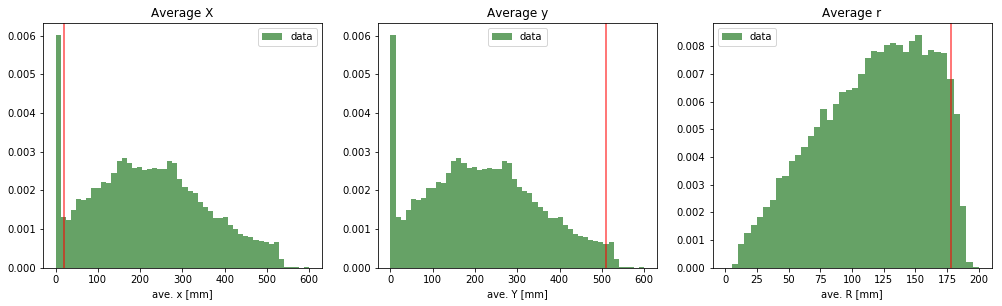

In [42]:
plt.figure(figsize=(17, 4.5));
plt.subplot(1,3,1);
plt.hist(summary[~summary.evt_out_of_map].evt_z_avg, 50, (0, 600), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=20, color='red', alpha=0.7);
plt.legend();
plt.title('Average X');
plt.xlabel('ave. x [mm]');
plt.subplot(1,3,2);
plt.hist(summary[~summary.evt_out_of_map].evt_z_avg, 50, (0, 600), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=510, color='red', alpha=0.7);
plt.title('Average y');
plt.xlabel('ave. Y [mm]');
plt.subplot(1,3,3);
plt.hist(summary[~summary.evt_out_of_map].evt_r_avg, 40, (0, 200), density=1, label='data', alpha=0.6, color='darkgreen');
plt.legend();
plt.axvline(x=178, color='red', alpha=0.7);
plt.legend(loc='upper left');
plt.title('Average r');
plt.xlabel('ave. R [mm]');

# Tracking/Tracks : all variables related to tracks

In [43]:
tracks.columns

Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min',
       'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave',
       'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y',
       'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y',
       'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x',
       'vox_size_y', 'vox_size_z'],
      dtype='object')

In [44]:
tracks.head().T

,0,1,2,3,4
event,2.822658e+06,2.822658e+06,2.819933e+06,2.819939e+06,2.822674e+06
trackID,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
energy,3.914379e-01,1.896689e-02,2.128483e-01,2.437901e-01,1.873246e-01
length,2.354347e+01,0.000000e+00,3.340266e+01,1.802776e+01,1.414214e+01
numb_of_voxels,6.000000e+00,1.000000e+00,6.000000e+00,4.000000e+00,3.000000e+00
numb_of_hits,3.400000e+01,4.000000e+00,2.500000e+01,2.900000e+01,2.100000e+01
numb_of_tracks,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
x_min,-1.350000e+02,-1.950000e+02,-3.500000e+01,-1.500000e+01,1.050000e+02
y_min,3.500000e+01,1.500000e+01,-1.950000e+02,9.500000e+01,5.500000e+01
z_min,3.099878e+01,9.996970e+01,5.247733e+01,2.723883e+02,2.324611e+02


In [45]:
#lets check that energy in summary is equal to the sum of track energies 
event_energy_from_track = tracks.groupby('event').agg({'energy':np.sum})
aux_df = summary[['event', 'evt_energy', 'evt_out_of_map']].merge(event_energy_from_track, on='event', how='outer')

In [46]:
np.testing.assert_allclose(aux_df[~aux_df.evt_out_of_map].evt_energy, aux_df[~aux_df.evt_out_of_map].energy)

### In tracks all variables are finite because we dont take into account out-of-map hits when calculating tracks!

In [47]:
all(np.isfinite(event_energy_from_track.energy))

True

# CHITS/Events : inclusive list of hits above charge threshold


In [48]:
hits.head().T

,0,1,2,3,4
event,2.822658e+06,2.822658e+06,2.822658e+06,2.822658e+06,2.822658e+06
time,1.542793e+09,1.542793e+09,1.542793e+09,1.542793e+09,1.542793e+09
npeak,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Xpeak,-2.029286e+02,-2.029286e+02,-2.029286e+02,-2.029286e+02,-2.029286e+02
Ypeak,1.726204e+01,1.726204e+01,1.726204e+01,1.726204e+01,1.726204e+01
nsipm,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
X,-2.050000e+02,-2.050000e+02,-2.050000e+02,-2.050000e+02,-2.050000e+02
Y,1.500000e+01,1.500000e+01,2.500000e+01,1.500000e+01,2.500000e+01
Xrms,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Yrms,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### Ep is the energy used for track reconstruction; it differes from Ec because the drop_end_point voxel algorithm is applied

In [49]:
event_energies_from_hits = hits.groupby('event', as_index=False).agg({'Ep':sum, 'Ec':sum}) #note that pandas will calculate np.nansum by defalult_

In [50]:
#test that sum of Ep is the same as sum Ec
np.testing.assert_allclose(event_energies_from_hits.Ep, event_energies_from_hits.Ec)

In [51]:
aux_df = aux_df.merge(event_energies_from_hits, on ='event')
np.testing.assert_allclose(aux_df[~aux_df.evt_out_of_map].evt_energy, aux_df[~aux_df.evt_out_of_map].Ep )

In [52]:
event_energies_from_hits_nan = hits.groupby('event', sort=False).Ec.apply(pd.Series.sum, skipna=False).reset_index()
event_energies_from_hits_nan.columns = ['event', 'Ecnan']
aux_df = aux_df.merge(event_energies_from_hits_nan, on ='event')
np.testing.assert_array_almost_equal(aux_df.evt_out_of_map, np.isnan(aux_df.Ecnan))

## Some useful(?) plotting functions

In [53]:
def bounding_box(hits_pos            : np.ndarray,
                 bounding_box_centre : np.array  ):
    """Returns two arrays defining the coordinates of a box that bounds the voxels"""
    mins     = np.min(hits_pos, axis=0)
    maxs     = np.max(hits_pos, axis=0)
    max_dist = np.maximum(np.abs(bounding_box_centre - mins),
                          np.abs(bounding_box_centre - maxs))
    return (bounding_box_centre - max_dist,
            bounding_box_centre + max_dist)


def voxelize_hits_per_ev(hits             : pd.DataFrame,
                         voxel_dimensions : np.ndarray  ,
                         en_v_type        : str         = 'Ec') -> np.ndarray:
    hits_nonan = hits[['X', 'Y', 'Z', en_v_type]].dropna()
    hits_e   = hits_nonan.loc[:, en_v_type    ].values
    hits_pos = hits_nonan.loc[:, ('X','Y','Z')].values

    bounding_box_centre = np.sum(hits_pos.transpose() *  hits_e / hits_e.sum(), axis=1)
    hlo, hhi            = bounding_box(hits_pos, bounding_box_centre)
    bounding_box_size   = hhi - hlo
    
    number_of_voxels = np.ceil(bounding_box_size / voxel_dimensions).astype(np.int)
    number_of_voxels = np.clip(number_of_voxels, a_min=1, a_max=None)

    half_range     = number_of_voxels * voxel_dimensions / 2
    voxel_edges_lo = bounding_box_centre - half_range
    voxel_edges_hi = bounding_box_centre + half_range
    
    eps = 3e-12
    voxel_edges_lo -= eps
    voxel_edges_hi += eps
    
    E, edges = np.histogramdd(hits_pos,
                              bins    = number_of_voxels,
                              range   = tuple(zip(voxel_edges_lo, voxel_edges_hi)),
                              weights = hits_e)
    return E


def fit_data_to_size(data):
    size   = np.full(3, np.max(data.shape))
    zeros  = np.zeros(3)
    pad_b  = (size - data.shape) // 2
    pad_a  =  size - data.shape - pad_b
    padded = np.pad(data, np.column_stack([pad_b, pad_a]), mode='constant')
    
    return padded

In [54]:
def plot_3d_vox(xarr, th=0, edgecolor=None, cmap=mpl.cm.jet):
    dim     = xarr.shape
    voxels  = xarr > th
    
    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 18])
    norm = mpl.colors.Normalize(vmin=xarr.min(), vmax=xarr.max())
    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    colors = np.asarray(np.vectorize(m.to_rgba)(xarr))
    colors = np.rollaxis(colors, 0, 4)

    ax.voxels(voxels, facecolors=colors, edgecolor=edgecolor)
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')
    
    #ax.view_init(elev=35, azim=-55)
    
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Z (mm)')
    cb.set_label ('E (MeV)')

    ax.set_aspect(1.0)    
    plt.show()


def plot_3d_hits(hits, energy='Ec', cmap = mpl.cm.jet):
    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 18])
    norm = mpl.colors.Normalize(vmin=hits.loc[:, energy].min(), vmax=hits.loc[:, energy].max())
    
    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    colors = np.asarray(np.vectorize(m.to_rgba)(hits.loc[:, energy]))
    colors = np.rollaxis(colors, 0, 2)

    ax.scatter(hits.X, hits.Y, hits.Z, c=colors, marker='o')
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')
    
    #ax.view_init(elev=35, azim=-55)
    
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Z (mm)')
    cb.set_label ('E (MeV)')

    plt.show()

    
def plot_3d_vox_n_hits(xarr, hits, th=0, energy='Ec', edgecolor=None, cmap=mpl.cm.jet):
    dim     = xarr.shape
    voxels  = xarr > th
    
    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 17])
    norm = mpl.colors.Normalize(vmin=xarr.min(), vmax=xarr.max())
    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    colors = np.asarray(np.vectorize(m.to_rgba)(xarr))
    colors = np.rollaxis(colors, 0, 4)

    ax.voxels(voxels, facecolors=colors, edgecolor=edgecolor)
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')
    
    #ax.view_init(elev=35, azim=-55)
    
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Z (mm)')
    cb.set_label ('E (MeV)')

    ax.set_aspect(1.0)   
    
    
    
    ax   = fig.add_subplot(gs[0, 20:36], projection = '3d')
    axcb = fig.add_subplot(gs[0, 37])
    norm = mpl.colors.Normalize(vmin=hits.loc[:, energy].min(), vmax=hits.loc[:, energy].max())
    
    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    colors = np.asarray(np.vectorize(m.to_rgba)(hits.loc[:, energy]))
    colors = np.rollaxis(colors, 0, 2)

    ax.scatter(hits.X, hits.Y, hits.Z, c=colors, marker='o')
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')
    
    #ax.view_init(elev=35, azim=-55)
    
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Z (mm)')
    cb.set_label ('E (MeV)')

    plt.show()

In [55]:
event_list = summary[(summary.evt_ntrks==1) & (summary.evt_energy>1)].event.unique()

In [56]:
event = np.random.choice(event_list)
hits_ev = hits[hits.event == event]
tracks_ev = tracks[tracks.event == event]

In [57]:
voxels = voxelize_hits_per_ev(hits_ev.dropna(),tracks_ev[['vox_size_x','vox_size_y', 'vox_size_z']].values[0], en_v_type = 'Ep')

voxels_pad = fit_data_to_size(voxels)

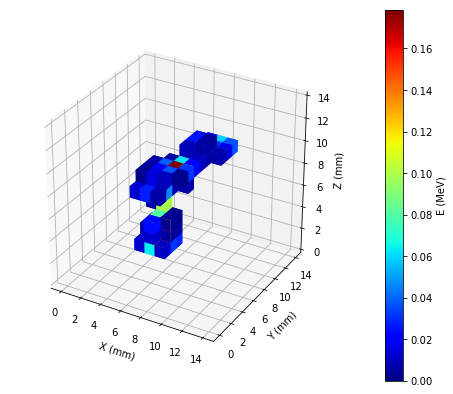

In [58]:
plot_3d_vox(voxels_pad)

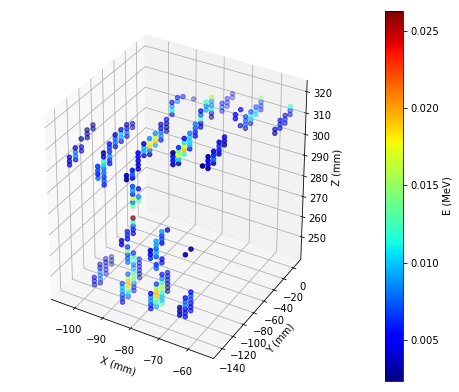

In [59]:
plot_3d_hits(hits_ev.dropna(), energy='Ep')

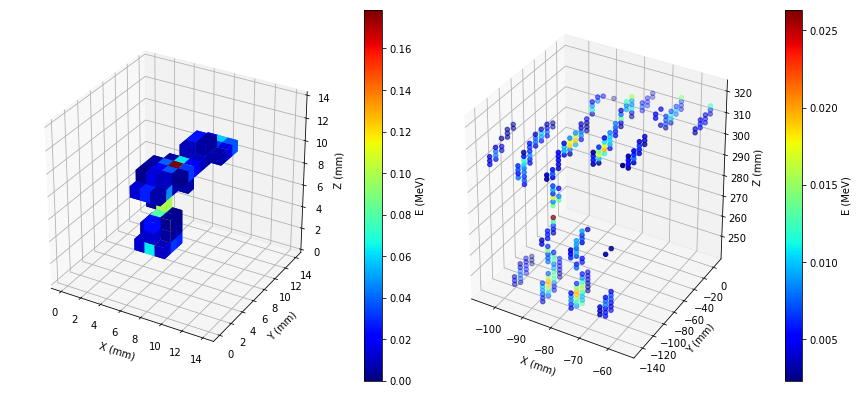

In [60]:
plot_3d_vox_n_hits(voxels_pad, hits_ev.dropna(), energy='Ec')